In [ ]:
!pip install openpyxl

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as sm
import datetime as dt

In [ ]:
df = pd.read_excel("FORECASTING BUSINESS PERFORMANCE.xlsx", sheet_name= None)

#### New dataset

In [5]:
df.keys()

dict_keys(['SalesFact', 'Geography', 'Product'])

In [5]:
sales = df['SalesFact']
geo = df['Geography']
product = df['Product']

### Test for new dataset Validity

In [6]:
sales.shape

(976243, 6)

In [7]:
print(f'Test: {sale_test.shape}, train: {sale_train.shape}')

Test: (74682, 6), train: (901561, 6)


In [8]:
sale_train_sample = sales[sales['Date'].dt.year <= 2020]
sale_train_sample.shape

(901561, 6)

In [7]:
print(f"Sales: {sales.shape} \nGeo: {geo.shape} \nProduct : {product.shape}")

Sales: (976243, 6) 
Geo: (39948, 5) 
Product : (2412, 4)


### Sales Table Summary

In [10]:
sales.isna().sum()

ProductID     0
Date          0
Zip           0
Units         0
Revenue      41
COGS          0
dtype: int64

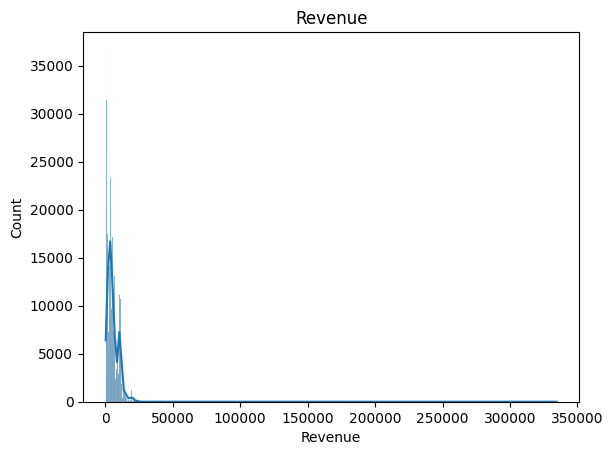

In [16]:
sns.histplot(sales['Revenue'], kde = True)
plt.title("Revenue")
plt.show()

Revenue is right skewed so we can take the median for NULL handling

In [9]:
sales['Revenue'] = sales['Revenue'].replace(np.nan, sales['Revenue'].median())
sales.isna().sum()

ProductID    0
Date         0
Zip          0
Units        0
Revenue      0
COGS         0
dtype: int64

In [17]:
sales

,ProductID,Date,Zip,Units,Revenue,COGS
0,1228,2013-07-31,78773,12,19648.44,12309.747660
1,781,2014-03-12,90501,16,20351.52,13497.128064
2,2090,2013-11-29,44460,26,111367.62,91488.499830
3,1116,2018-08-29,30122,12,36280.44,21967.806420
4,993,2013-04-27,75789,14,55557.18,48645.866808
...,...,...,...,...,...,...
976238,2213,2013-08-12,15135,1,1070.37,749.794185
976239,2213,2011-12-04,80120,1,1070.37,749.794185
976240,2213,2011-05-29,30028,1,1070.37,749.794185
976241,2213,2014-04-01,65279,1,1070.37,749.794185


#### Find relevant information

In [22]:
sales['Year'] = sales['Date'].dt.year

print(f"From {sales['Year'].min()} to {sales['Year'].max()}")

From 2010 to 2022


In [10]:
sales['Profit'] = sales['Revenue'] - sales['COGS']

In [ ]:
sales

,ProductID,Date,Zip,Units,Revenue,COGS,Profit
0,1228,2013-07-31,78773,12,19648.44,12309.747660,7338.692340
1,781,2014-03-12,90501,16,20351.52,13497.128064,6854.391936
2,2090,2013-11-29,44460,26,111367.62,91488.499830,19879.120170
3,1116,2018-08-29,30122,12,36280.44,21967.806420,14312.633580
4,993,2013-04-27,75789,14,55557.18,48645.866808,6911.313192
...,...,...,...,...,...,...,...
976238,2213,2013-08-12,15135,1,1070.37,749.794185,320.575815
976239,2213,2011-12-04,80120,1,1070.37,749.794185,320.575815
976240,2213,2011-05-29,30028,1,1070.37,749.794185,320.575815
976241,2213,2014-04-01,65279,1,1070.37,749.794185,320.575815


### Geography Table Summary

In [20]:
geo

,Zip,City,State,Region,District
0,15201,"Pittsburgh, PA",PA,East,District #13
1,15202,"Pittsburgh, PA",PA,East,District #13
2,15203,"Pittsburgh, PA",PA,East,District #13
3,15204,"Pittsburgh, PA",PA,East,District #13
4,15205,"Pittsburgh, PA",PA,East,District #13
...,...,...,...,...,...
39943,59933,"Stryker, MT",MT,West,District #33
39944,59934,"Trego, MT",MT,West,District #33
39945,59935,"Troy, MT",MT,West,District #33
39946,59936,"West Glacier, MT",MT,West,District #33


In [11]:
geo['City'] = geo['City'].str.split(',').str[0]

In [24]:
geo

,Zip,City,State,Region,District
0,15201,Pittsburgh,PA,East,District #13
1,15202,Pittsburgh,PA,East,District #13
2,15203,Pittsburgh,PA,East,District #13
3,15204,Pittsburgh,PA,East,District #13
4,15205,Pittsburgh,PA,East,District #13
...,...,...,...,...,...
39943,59933,Stryker,MT,West,District #33
39944,59934,Trego,MT,West,District #33
39945,59935,Troy,MT,West,District #33
39946,59936,West Glacier,MT,West,District #33


In [12]:
geo['District'] = geo['District'].str.split('#').str[1]

In [26]:
geo

,Zip,City,State,Region,District
0,15201,Pittsburgh,PA,East,13
1,15202,Pittsburgh,PA,East,13
2,15203,Pittsburgh,PA,East,13
3,15204,Pittsburgh,PA,East,13
4,15205,Pittsburgh,PA,East,13
...,...,...,...,...,...
39943,59933,Stryker,MT,West,33
39944,59934,Trego,MT,West,33
39945,59935,Troy,MT,West,33
39946,59936,West Glacier,MT,West,33


In [47]:
geo['City'].value_counts().sort_values(ascending = False)

City
Washington                  297
Houston                     188
New York                    149
El Paso                     140
Dallas                      114
                           ... 
Padre Island Ntl Seashor      1
Lakeport                      1
Toyahvale                     1
Wickett                       1
Whitefish                     1
Name: count, Length: 18145, dtype: int64

We can see the top 5 City with the most purchase

In [13]:
sales = pd.merge(sales, geo, on = 'Zip', how = 'left')

In [10]:
sales

,ProductID,Date,Zip,Units,Revenue,COGS,Profit,City,State,Region,District
0,1228,2013-07-31,78773,12,19648.44,12309.747660,7338.692340,Austin,TX,Central,23
1,781,2014-03-12,90501,16,20351.52,13497.128064,6854.391936,Torrance,CA,West,37
2,2090,2013-11-29,44460,26,111367.62,91488.499830,19879.120170,Salem,OH,East,14
3,1116,2018-08-29,30122,12,36280.44,21967.806420,14312.633580,Lithia Springs,GA,East,09
4,993,2013-04-27,75789,14,55557.18,48645.866808,6911.313192,Troup,TX,Central,24
...,...,...,...,...,...,...,...,...,...,...,...
976238,2213,2013-08-12,15135,1,1070.37,749.794185,320.575815,Mckeesport,PA,East,13
976239,2213,2011-12-04,80120,1,1070.37,749.794185,320.575815,Littleton,CO,Central,20
976240,2213,2011-05-29,30028,1,1070.37,749.794185,320.575815,Cumming,GA,East,09
976241,2213,2014-04-01,65279,1,1070.37,749.794185,320.575815,Rocheport,MO,Central,29


In [11]:
sales.isna().sum()

ProductID    0
Date         0
Zip          0
Units        0
Revenue      0
COGS         0
Profit       0
City         0
State        0
Region       0
District     0
dtype: int64

In [14]:
sales = sales.drop(['State', 'District', 'Zip'], axis = 1)

In [16]:
train = sales[sales['Date'].dt.year <= 2020]
test = sales [sales['Date'].dt.year >= 2021]

print(f'train: {train.shape}, test: {test.shape}')

train: (901561, 8), test: (74682, 8)


### Product Table Summary

In [ ]:
product

,Category,Segment,Product,ProductID
0,Urban,Convenience,Maximus UC-01,536
1,Urban,Convenience,Maximus UC-02,537
2,Urban,Convenience,Maximus UC-03,538
3,Urban,Convenience,Maximus UC-04,539
4,Urban,Convenience,Maximus UC-05,540
...,...,...,...,...
2407,Mix,Productivity,Quibus MP-28,1260
2408,Mix,Productivity,Quibus MP-29,1261
2409,Mix,Productivity,Quibus MP-30,1262
2410,Mix,Productivity,Quibus MP-31,1263


In [49]:
product.isna().sum()

Category     0
Segment      0
Product      0
ProductID    0
dtype: int64

Text(0.5, 1.0, 'Segment')

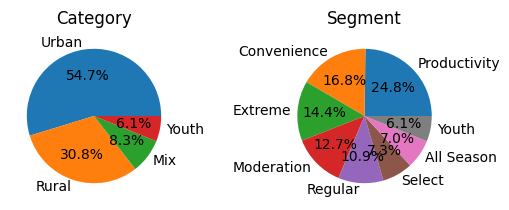

In [58]:
plt.subplot(2,2,1)
plt.pie(product['Category'].value_counts(), autopct= '%1.1f%%', labels=product['Category'].value_counts().index)
plt.title('Category')


plt.subplot(2,2,2)
plt.pie(product['Segment'].value_counts(), autopct= '%1.1f%%', labels=product['Segment'].value_counts().index)
plt.title('Segment')

In [51]:
product['Segment'].value_counts()

Segment
Productivity    598
Convenience     405
Extreme         347
Moderation      306
Regular         262
Select          177
All Season      169
Youth           148
Name: count, dtype: int64